# custom scorecard

In [5]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import warnings

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import scorecardpy as sc
import pprint

import matplotlib.pyplot as plt

In [6]:
DATA_PATH = Path("merged_applicant_and_bureau_cleaned.csv")   
df = pd.read_csv(DATA_PATH)
df

,SK_ID_CURR,TARGET,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,...,CNT_CREDIT_PROLONG_sum,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Microloan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Another type of loan,DEBT_RATIO,OVERDUE_RATIO
0,100003,0,State servant,Married,0,270000.0,1293502.5,35698.5,1129500.0,-1188.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100004,0,Working,Single / not married,0,67500.0,135000.0,6750.0,135000.0,-225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100006,0,Working,Civil marriage,0,135000.0,312682.5,29686.5,297000.0,-3039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100007,0,Working,Single / not married,0,121500.0,513000.0,21865.5,513000.0,-3038.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100008,0,State servant,Married,0,99000.0,490495.5,27517.5,454500.0,-1588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254353,456248,0,Working,Separated,0,153000.0,331920.0,16096.5,225000.0,-7258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254354,456252,0,Pensioner,Widow,0,72000.0,269550.0,12001.5,225000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254355,456253,0,Working,Separated,0,153000.0,677664.0,29979.0,585000.0,-7921.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254356,456254,1,Commercial associate,Married,0,171000.0,370107.0,20205.0,319500.0,-4786.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = df[[
    "TARGET",
    "DEBT_RATIO",
    "AMT_ANNUITY",
    "NAME_INCOME_TYPE",
    "AMT_CREDIT",
    "AGE",
    "OCCUPATION_TYPE",
    "CREDIT_ACTIVE_Active",
    "DAYS_EMPLOYED"
]]
df

,TARGET,DEBT_RATIO,AMT_ANNUITY,NAME_INCOME_TYPE,AMT_CREDIT,AGE,OCCUPATION_TYPE,CREDIT_ACTIVE_Active,DAYS_EMPLOYED
0,0,0.0,35698.5,State servant,1293502.5,45.931507,Core staff,0.0,-1188.0
1,0,NaN,6750.0,Working,135000.0,52.180822,Laborers,NaN,-225.0
2,0,NaN,29686.5,Working,312682.5,52.068493,Laborers,NaN,-3039.0
3,0,NaN,21865.5,Working,513000.0,54.608219,Core staff,NaN,-3038.0
4,0,NaN,27517.5,State servant,490495.5,46.413699,Laborers,NaN,-1588.0
...,...,...,...,...,...,...,...,...,...
254353,0,NaN,16096.5,Working,331920.0,45.767123,Sales staff,NaN,-7258.0
254354,0,NaN,12001.5,Pensioner,269550.0,56.917808,NaN,NaN,NaN
254355,0,NaN,29979.0,Working,677664.0,41.002740,Managers,NaN,-7921.0
254356,1,0.0,20205.0,Commercial associate,370107.0,32.769863,Laborers,0.0,-4786.0


In [8]:
df.isnull().sum()


TARGET                      0
DEBT_RATIO              98302
AMT_ANNUITY                 9
NAME_INCOME_TYPE            0
AMT_CREDIT                  0
AGE                         0
OCCUPATION_TYPE         81149
CREDIT_ACTIVE_Active    98302
DAYS_EMPLOYED           47945
dtype: int64

In [9]:
# Fill numeric columns with 0
df['DEBT_RATIO'] = df['DEBT_RATIO'].fillna(0)
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)
df['CREDIT_ACTIVE_Active'] = df['CREDIT_ACTIVE_Active'].fillna(0)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(0)

# Fill OCCUPATION_TYPE with 'MISSING'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('MISSING')

# Verify no missing values remain
print(df.isnull().sum())

TARGET                  0
DEBT_RATIO              0
AMT_ANNUITY             0
NAME_INCOME_TYPE        0
AMT_CREDIT              0
AGE                     0
OCCUPATION_TYPE         0
CREDIT_ACTIVE_Active    0
DAYS_EMPLOYED           0
dtype: int64


/var/folders/69/hc5tv1pn547clcgc4pkpgsp80000gn/T/ipykernel_12550/73337697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEBT_RATIO'] = df['DEBT_RATIO'].fillna(0)
/var/folders/69/hc5tv1pn547clcgc4pkpgsp80000gn/T/ipykernel_12550/73337697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)
/var/folders/69/hc5tv1pn547clcgc4pkpgsp80000gn/T/ipykernel_12550/73337697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [10]:
train, test = sc.split_df(df, y = 'TARGET', ratio = .7).values()
print(train.shape)
print(test.shape)

(178050, 9)
(76308, 9)


In [11]:
custom_breaks = {
    'DEBT_RATIO': [-0.001, 0.0557, 0.352, 1426.867],
    'AMT_ANNUITY': [1615.5, 14823.0, 21888.0, 27909.0, 37102.5, 225000.0],
    'NAME_INCOME_TYPE': ["Businessman", "Commercial associate", "Pensioner", "State servant", "Student", "Working"],
    'AMT_CREDIT': [0, 200000, 500000, 1000000, 2000000, 4000000],
    'AGE': [30, 40, 50, 60, 70],
    'OCCUPATION_TYPE': ["Accountants", "Core staff", "Drivers", "High skill tech staff", "Laborers", "MISSING", "Managers", "Medicine staff", "OTHER", "Sales staff", "Security staff"],
    'CREDIT_ACTIVE_Active': [0.001, 1.5, 3.0, 12.0],
    'DAYS_EMPLOYED': [-17000, -4000, -1500, 0]
}

# Step 4: Apply `woebin` with custom bins (force custom binning)
bins = sc.woebin(train, y='TARGET', breaks_list=custom_breaks)

# Step 5: Display the results for verification
for variable, bin_details in bins.items():
    print(variable, " : ")
    display(bin_details)  # Use display() in Jupyter notebooks or print if you're running in a script
    print("--" * 50)

[INFO] creating woe binning ...


/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensur

AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE,"[-inf,40.0)",57726,0.324212,52184,5542,0.096005,0.253784,2.325863e-02,0.050166,40.0,False
1,AGE,"[40.0,50.0)",53441,0.300146,49379,4062,0.076009,-0.001645,8.118559e-07,0.050166,50.0,False
2,AGE,"[50.0,60.0)",47659,0.267672,44714,2945,0.061793,-0.223973,1.221667e-02,0.050166,60.0,False
3,AGE,"[60.0,70.0)",19224,0.107970,18219,1005,0.052278,-0.401273,1.469006e-02,0.050166,70.0,False


----------------------------------------------------------------------------------------------------
CREDIT_ACTIVE_Active  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_ACTIVE_Active,"[-inf,0.001)",129838,0.729222,120666,9172,0.070642,-0.080733,0.004593,0.022023,0.001,False
1,CREDIT_ACTIVE_Active,"[0.001,1.5)",34428,0.193361,31538,2890,0.083943,0.106201,0.002281,0.022023,1.5,False
2,CREDIT_ACTIVE_Active,"[1.5,3.0)",9696,0.054457,8720,976,0.100660,0.306226,0.005816,0.022023,3.0,False
3,CREDIT_ACTIVE_Active,"[3.0,12.0)",4087,0.022954,3571,516,0.126254,0.561644,0.009188,0.022023,12.0,False
4,CREDIT_ACTIVE_Active,"[12.0,inf)",1,0.000006,1,0,0.000000,2.390778,0.000144,0.022023,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,Businessman,4,0.000022,4,0,0.000000,1.004417,0.000042,0.04844,Businessman,False
1,NAME_INCOME_TYPE,Commercial associate,40595,0.227998,37771,2824,0.069565,-0.097316,0.002072,0.04844,Commercial associate,False
2,NAME_INCOME_TYPE,Pensioner,33585,0.188627,31707,1878,0.055918,-0.330258,0.017905,0.04844,Pensioner,False
3,NAME_INCOME_TYPE,State servant,12838,0.072103,12161,677,0.052734,-0.392246,0.009409,0.04844,State servant,False
4,NAME_INCOME_TYPE,Student,8,0.000045,8,0,0.000000,0.311270,0.000006,0.04844,Student,False
5,NAME_INCOME_TYPE,Working,91003,0.511109,82836,8167,0.089744,0.179311,0.017733,0.04844,Working,False
6,NAME_INCOME_TYPE,missing,17,0.000095,9,8,0.470588,2.378289,0.001273,0.04844,missing,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,200000.0)",17956,0.100848,16792,1164,0.064825,-0.172902,0.002802,0.025784,200000.0,False
1,AMT_CREDIT,"[200000.0,500000.0)",61501,0.345414,56323,5178,0.084194,0.109454,0.004335,0.025784,500000.0,False
2,AMT_CREDIT,"[500000.0,1000000.0)",66513,0.373564,61136,5377,0.080841,0.065168,0.001631,0.025784,1000000.0,False
3,AMT_CREDIT,"[1000000.0,2000000.0)",30768,0.172805,28973,1795,0.058340,-0.285221,0.012466,0.025784,2000000.0,False
4,AMT_CREDIT,"[2000000.0,4000000.0)",1305,0.007329,1265,40,0.030651,-0.957810,0.004539,0.025784,4000000.0,False
5,AMT_CREDIT,"[4000000.0,inf)",7,0.000039,7,0,0.000000,0.444867,0.000011,0.025784,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY,"[-inf,1615.5)",6,0.000034,6,0,0.000000,0.598952,0.000018,0.019731,1615.5,False
1,AMT_ANNUITY,"[1615.5,14823.0)",33424,0.187723,31198,2226,0.066599,-0.144076,0.003666,0.019731,14823.0,False
2,AMT_ANNUITY,"[14823.0,21888.0)",34289,0.192581,31526,2763,0.080580,0.061576,0.000750,0.019731,21888.0,False
3,AMT_ANNUITY,"[21888.0,27909.0)",34882,0.195911,31985,2897,0.083051,0.094480,0.001820,0.019731,27909.0,False
4,AMT_ANNUITY,"[27909.0,37102.5)",36289,0.203814,33096,3193,0.087988,0.157620,0.005414,0.019731,37102.5,False
5,AMT_ANNUITY,"[37102.5,225000.0)",39145,0.219854,36670,2475,0.063226,-0.199647,0.008055,0.019731,225000.0,False
6,AMT_ANNUITY,"[225000.0,inf)",15,0.000084,15,0,0.000000,-0.317339,0.000008,0.019731,inf,False


----------------------------------------------------------------------------------------------------
DEBT_RATIO  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEBT_RATIO,"[-inf,0.0557)",156218,0.877383,145186,11032,0.070619,-0.081011,0.005564,0.044276,0.0557,False
1,DEBT_RATIO,"[0.0557,0.352)",10887,0.061146,9869,1018,0.093506,0.224646,0.003395,0.044276,0.352,False
2,DEBT_RATIO,"[0.352,1426.867)",10945,0.061471,9441,1504,0.137414,0.659271,0.035317,0.044276,1426.867,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-4000.0)",30401,0.170744,28889,1512,0.049735,-0.453823,0.029075,0.088534,-4000.0,False
1,DAYS_EMPLOYED,"[-4000.0,-1500.0)",54468,0.305914,50433,4035,0.074080,-0.029435,0.000262,0.088534,-1500.0,False
2,DAYS_EMPLOYED,"[-1500.0,0.0)",59588,0.334670,53466,6122,0.102739,0.329047,0.041672,0.088534,0.0,False
3,DAYS_EMPLOYED,"[0.0,inf)",33593,0.188672,31708,1885,0.056113,-0.326437,0.017525,0.088534,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,Accountants,5704,0.032036,5442,262,0.045933,-0.537353,0.007390,0.070551,Accountants,False
1,OCCUPATION_TYPE,Core staff,14692,0.082516,13891,801,0.054519,-0.356931,0.009048,0.070551,Core staff,False
2,OCCUPATION_TYPE,Drivers,11202,0.062915,9998,1204,0.107481,0.379469,0.010644,0.070551,Drivers,False
3,OCCUPATION_TYPE,High skill tech staff,6491,0.036456,6101,390,0.060083,-0.253857,0.002111,0.070551,High skill tech staff,False
4,OCCUPATION_TYPE,Laborers,31734,0.178231,28584,3150,0.099263,0.290760,0.017049,0.070551,Laborers,False
5,OCCUPATION_TYPE,MISSING,56697,0.318433,53071,3626,0.063954,-0.187296,0.010321,0.070551,MISSING,False
6,OCCUPATION_TYPE,Managers,13427,0.075411,12621,806,0.060028,-0.254829,0.004398,0.070551,Managers,False
7,OCCUPATION_TYPE,Medicine staff,5167,0.029020,4846,321,0.062125,-0.218263,0.001261,0.070551,Medicine staff,False
8,OCCUPATION_TYPE,Sales staff,17143,0.096282,15639,1504,0.087733,0.154565,0.002456,0.070551,Sales staff,False
9,OCCUPATION_TYPE,Security staff,4245,0.023842,3802,443,0.104358,0.346492,0.003316,0.070551,Security staff,False


----------------------------------------------------------------------------------------------------


In [12]:
# sample code

# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,AGE_woe,CREDIT_ACTIVE_Active_woe,NAME_INCOME_TYPE_woe,AMT_CREDIT_woe,AMT_ANNUITY_woe,DEBT_RATIO_woe,DAYS_EMPLOYED_woe,OCCUPATION_TYPE_woe
0,0,-0.001645,-0.080733,-0.392246,-0.285221,0.157620,-0.081011,0.329047,-0.356931
1,0,-0.223973,-0.080733,0.179311,-0.172902,-0.144076,-0.081011,0.329047,0.290760
3,0,-0.223973,-0.080733,0.179311,0.065168,0.061576,-0.081011,-0.029435,-0.356931
5,0,0.253784,-0.080733,-0.097316,-0.285221,-0.199647,-0.081011,-0.029435,-0.537353
6,0,-0.223973,-0.080733,-0.392246,-0.285221,-0.199647,-0.081011,0.329047,-0.254829
...,...,...,...,...,...,...,...,...,...
254350,0,0.253784,-0.080733,-0.097316,0.109454,-0.144076,-0.081011,0.329047,NaN
254352,0,0.253784,-0.080733,-0.097316,0.109454,0.061576,-0.081011,0.329047,-0.356931
254353,0,-0.001645,-0.080733,0.179311,0.109454,0.061576,-0.081011,-0.453823,0.154565
254354,0,-0.223973,-0.080733,-0.330258,0.109454,-0.144076,-0.081011,-0.326437,-0.187296


In [13]:
y_train = train_woe.loc[:, 'TARGET']
X_train = train_woe.loc[:, train_woe.columns != 'TARGET']
y_test = test_woe.loc[:, 'TARGET']
X_test = test_woe.loc[:, train_woe.columns != 'TARGET']

#THIS NOT THE RIGHT THING TO DO I THINK 
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# create a logistic regression model object
lr = linear_model.LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

intercept                   0.012166
AGE_woe                     0.531307
CREDIT_ACTIVE_Active_woe    0.859246
NAME_INCOME_TYPE_woe        0.213512
AMT_CREDIT_woe              0.652666
AMT_ANNUITY_woe             0.598690
DEBT_RATIO_woe              0.417692
DAYS_EMPLOYED_woe           0.692095
OCCUPATION_TYPE_woe         0.692091
dtype: float64

In [14]:
# sample code

# generate a card from the model and bins. The scores will be based on probability of default from the model
# bins = bins created from sc.woebin
# lr = fitted logistic regression model
# align target odds with probabity of default = 5%
# odds = p/(1-p) = 0.05/(1-0.05) = 0.0526 ~= 1/19
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/19, pdo = 20, basepoints_eq0 = True)

pprint.pprint(card)

{'AGE':   variable          bin  points
0      AGE  [-inf,40.0)    60.0
1      AGE  [40.0,50.0)    64.0
2      AGE  [50.0,60.0)    68.0
3      AGE  [60.0,70.0)    70.0,
 'AMT_ANNUITY':        variable                 bin  points
22  AMT_ANNUITY       [-inf,1615.5)    54.0
23  AMT_ANNUITY    [1615.5,14823.0)    67.0
24  AMT_ANNUITY   [14823.0,21888.0)    63.0
25  AMT_ANNUITY   [21888.0,27909.0)    63.0
26  AMT_ANNUITY   [27909.0,37102.5)    62.0
27  AMT_ANNUITY  [37102.5,225000.0)    68.0
28  AMT_ANNUITY      [225000.0,inf)    70.0,
 'AMT_CREDIT':       variable                    bin  points
16  AMT_CREDIT        [-inf,200000.0)    68.0
17  AMT_CREDIT    [200000.0,500000.0)    62.0
18  AMT_CREDIT   [500000.0,1000000.0)    63.0
19  AMT_CREDIT  [1000000.0,2000000.0)    70.0
20  AMT_CREDIT  [2000000.0,4000000.0)    82.0
21  AMT_CREDIT        [4000000.0,inf)    56.0,
 'CREDIT_ACTIVE_Active':                variable           bin  points
4  CREDIT_ACTIVE_Active  [-inf,0.001)    66.0
5  CRED

In [15]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# sample code

# check model performance at 1:5 odds of default
cutoff = 500

# create sets of predicted bad to compare with actual bad
predicted_bad_train = (train_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
predicted_bad_test = (test_score < cutoff)
predicted_bad_test_list = predicted_bad_test.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_train, predicted_bad_train_list))
print('PCC measures:')
print(metrics.classification_report(y_train, predicted_bad_train_list))
 
print('*** Test Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, predicted_bad_test_list))
print('PCC measures:')
print(metrics.classification_report(y_test, predicted_bad_test_list))

*** Training Data Performance ***
Confusion matrix:
[[117957  46539]
 [  8587   4967]]
PCC measures:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81    164496
           1       0.10      0.37      0.15     13554

    accuracy                           0.69    178050
   macro avg       0.51      0.54      0.48    178050
weighted avg       0.87      0.69      0.76    178050

*** Test Data Performance ***
Confusion matrix:
[[50792 19707]
 [ 3638  2171]]
PCC measures:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     70499
           1       0.10      0.37      0.16      5809

    accuracy                           0.69     76308
   macro avg       0.52      0.55      0.48     76308
weighted avg       0.87      0.69      0.76     76308



In [16]:
train_decision = -train_score['score']
test_decision  = -test_score['score']

Train AUC: 0.588
Test  AUC: 0.595


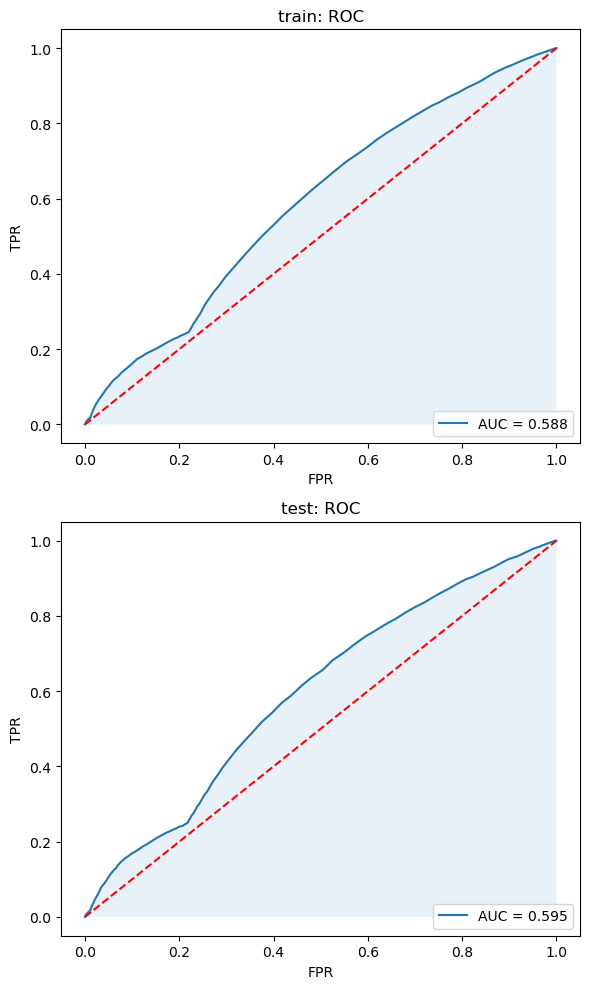

In [17]:
train_decision = -train_score
test_decision  = -test_score

# --- Compute ROC and AUC for train ---
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, train_decision)
auc_train = metrics.roc_auc_score(y_train, train_decision)

# --- Compute ROC and AUC for test ---
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, test_decision)
auc_test = metrics.roc_auc_score(y_test, test_decision)

print(f"Train AUC: {auc_train:.3f}")
print(f"Test  AUC: {auc_test:.3f}")

# --- Plot ROC curves (train + test) ---
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Train ROC
axes[0].plot(fpr_train, tpr_train, label=f"AUC = {auc_train:.3f}")
axes[0].plot([0, 1], [0, 1], 'r--')  # random baseline
axes[0].set_title("train: ROC")
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].fill_between(fpr_train, tpr_train, alpha=0.1)
axes[0].legend(loc="lower right")

# Test ROC
axes[1].plot(fpr_test, tpr_test, label=f"AUC = {auc_test:.3f}")
axes[1].plot([0, 1], [0, 1], 'r--')  # random baseline
axes[1].set_title("test: ROC")
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")
axes[1].fill_between(fpr_test, tpr_test, alpha=0.1)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [22]:
card

{'basepoints':      variable  bin  points
 0  basepoints  NaN       0,
 'AGE':   variable          bin  points
 0      AGE  [-inf,40.0)    60.0
 1      AGE  [40.0,50.0)    64.0
 2      AGE  [50.0,60.0)    68.0
 3      AGE  [60.0,70.0)    70.0,
 'CREDIT_ACTIVE_Active':                variable           bin  points
 4  CREDIT_ACTIVE_Active  [-inf,0.001)    66.0
 5  CREDIT_ACTIVE_Active   [0.001,1.5)    62.0
 6  CREDIT_ACTIVE_Active     [1.5,3.0)    57.0
 7  CREDIT_ACTIVE_Active    [3.0,12.0)    50.0
 8  CREDIT_ACTIVE_Active    [12.0,inf)     5.0,
 'NAME_INCOME_TYPE':             variable                   bin  points
 9   NAME_INCOME_TYPE           Businessman    58.0
 10  NAME_INCOME_TYPE  Commercial associate    65.0
 11  NAME_INCOME_TYPE             Pensioner    66.0
 12  NAME_INCOME_TYPE         State servant    67.0
 13  NAME_INCOME_TYPE               Student    62.0
 14  NAME_INCOME_TYPE               Working    63.0
 15  NAME_INCOME_TYPE               missing    50.0,
 'AMT_CREDIT

In [23]:
# combine all variable tables into one big dataframe
card_df = pd.concat(card.values(), ignore_index=True)

# show all rows (or set a big number)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

card_df

,variable,bin,points
0,basepoints,NaN,0.0
1,AGE,"[-inf,40.0)",60.0
2,AGE,"[40.0,50.0)",64.0
3,AGE,"[50.0,60.0)",68.0
4,AGE,"[60.0,70.0)",70.0
5,CREDIT_ACTIVE_Active,"[-inf,0.001)",66.0
6,CREDIT_ACTIVE_Active,"[0.001,1.5)",62.0
7,CREDIT_ACTIVE_Active,"[1.5,3.0)",57.0
8,CREDIT_ACTIVE_Active,"[3.0,12.0)",50.0
9,CREDIT_ACTIVE_Active,"[12.0,inf)",5.0
